In [2]:
import shutil
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import logistic
import time
from imutils.video import VideoStream
import imutils

In [3]:
os.getcwd()

'C:\\Users\\Agam\\Desktop\\python_projects\\mask_ML'

In [4]:
rootdir = 'C:\\Users\\Agam\\Desktop\\python_projects\\mask_ML\\dataset\\mask'

c=0

for subdir, dirs, files in os.walk(rootdir):
    for dir in dirs:
        for subdir1, dirs1, files1 in os.walk(rootdir +"\\" + dir):
            for file in files1:
                img = Image.open("dataset/mask/"+dir+"/"+file).convert('L')
                img = img.resize((40,40))
                a = np.array(img)
                if(c==0):
                    n=a.reshape(1,-1)
                else:    
                    n= np.append(n,a.reshape(1,-1),axis=0)
                c+=1
y=np.ones((c,1))
  

In [5]:
n.shape,y.shape

((2203, 1600), (2203, 1))

In [6]:
rootdir = 'C:\\Users\\Agam\\Desktop\\python_projects\\mask_ML\\dataset\\no_mask'

c=0

for subdir, dirs, files in os.walk(rootdir):
    for dir in dirs:
        for subdir1, dirs1, files1 in os.walk(rootdir +"\\" + dir):
            for file in files1:
                img = Image.open("dataset/no_mask/"+dir+"/"+file).convert('L')
                img = img.resize((40,40))
                a = np.array(img)
                n= np.append(n,a.reshape(1,-1),axis=0)
                c+=1
y=np.append(y,np.zeros((c,1)))

In [7]:

n.shape, y.shape

((10161, 1600), (10161,))

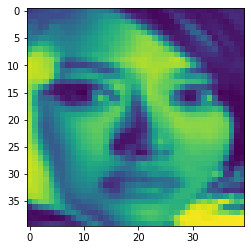

In [8]:
plt.imshow(n[2294].reshape(40,40))

In [9]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()
    def score(self, X, y):
        yp = self.predict(X)
        return np.mean(yp == y)

In [10]:
class KNN:
    def __init__(self, n_neighbours=2):
        self.n_neighbours = n_neighbours
        
    def fit(self, X, y):
        self._X = (X - X.mean()) / X.std() # standardisation
        self._y = y
    
    
    def predict_point(self, point):
        
        list_dist = []
        
        
        for x_point, y_point in zip(self._X, self._y):
            dist_point = ((point - x_point) ** 2).sum()
            list_dist.append([dist_point, y_point])
        
        
        sorted_dist = sorted(list_dist)
        top_k = sorted_dist[:self.n_neighbours]
        
        
        items, counts = np.unique(np.array(top_k)[:, 1], return_counts=True)
        ans = items[np.argmax(counts)]
        return ans
            
    
    def predict(self, X):
        results = []
        X = (X - X.mean()) / X.std() 
        for point in X:
            results.append(self.predict_point(point))
        return np.array(results, dtype=int)
    
    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)

In [11]:
class SVM:

    def __init__ (self, learning_rate=0.001, lambda_param=0.01, n_iters=100):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None


    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        
        for i in range(approx.size):
            if approx[i] > 0:
                approx[i]=1
            else:
                approx[i]=0
        
        return approx
    
    def score(self, X, y):
        yp = self.predict(X)
        return np.mean(yp == y)

In [12]:
model_LR = LogisticRegression()

In [13]:
model_KNN = KNN()

In [14]:
model_SVM = SVM()

In [15]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(n, y, test_size=0.30, random_state=32)

In [59]:
start = time.process_time()
model_LR.fit(X_train,y_train)
end_LR = time.process_time() - start
score_LR = model_LR.score(X_test,y_test)

<ipython-input-9-0744fc95db0b>:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-9-0744fc95db0b>:15: RuntimeWarning: divide by zero encountered in log
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
<ipython-input-9-0744fc95db0b>:15: RuntimeWarning: invalid value encountered in multiply
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()


In [60]:
score_LR

0.8340439488356838

In [61]:
start = time.process_time()
model_SVM.fit(X_train,y_train)
score_SVM = model_SVM.score(X_test,y_test)
end_SVM = time.process_time() - start

In [62]:
score_SVM

0.8547064611347983

In [63]:
start = time.process_time()
model_KNN.fit(X_train,y_train)
score_KNN = model_KNN.score(X_test,y_test)
end_KNN = time.process_time() - start

In [64]:
score_KNN

0.9025910134470319

In [65]:
time_data = {'LR':end_LR,'KNN':end_KNN,'SVM':end_SVM}

In [66]:
algo = list(time_data.keys()) 
values = list(time_data.values()) 

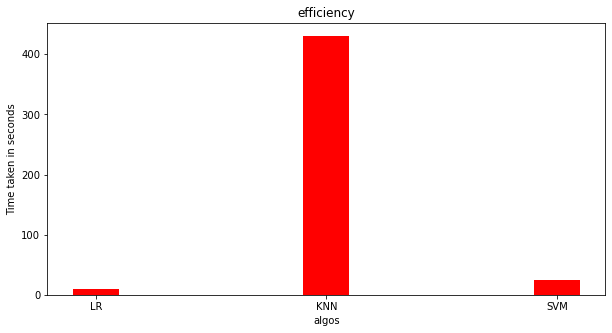

In [67]:
fig = plt.figure(figsize = (10, 5)) 
plt.bar(algo, values, color ='red',  
        width = 0.2) 
  
plt.xlabel("algos") 
plt.ylabel("Time taken in seconds") 
plt.title("efficiency") 
plt.show() 

In [68]:
score_data = {'LR':score_LR*100,'KNN':score_KNN*100,'SVM':score_SVM*100}

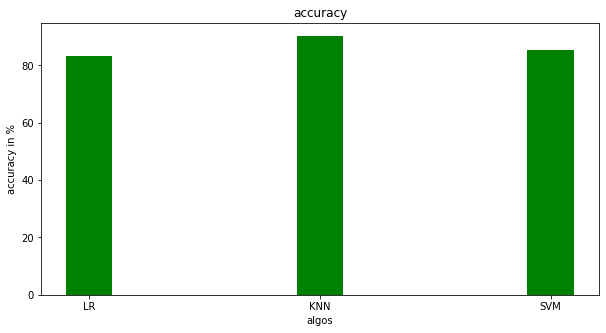

In [69]:
algo = list(score_data.keys()) 
values = list(score_data.values())
fig = plt.figure(figsize = (10, 5)) 
plt.bar(algo, values, color ='green',  
        width = 0.2) 
  
plt.xlabel("algos") 
plt.ylabel("accuracy in %") 
plt.title("accuracy") 
plt.show() 

In [ ]:
prototxtPath = r"face_detector\deploy.prototxt.txt"
weightsPath = r"face_detector\res10_300x300_ssd_iter_140000.caffemodel"
faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)
vs = VideoStream(src=0).start()
while True:
    frame = vs.read()
    #frame = imutils.resize(frame, width=400)
    pil = np.array(frame)
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 1.0, (224, 224),(104.0, 177.0, 123.0))


    faceNet.setInput(blob)
    detections = faceNet.forward()


    faces = []
    locs = []
    preds = []
    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.15:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            (startX, startY) = (max(0, startX), max(0, startY))
            (endX, endY) = (min(w - 1, endX), min(h - 1, endY))
            #cv2.rectangle(frame, (startX, startY), (endX, endY), (255,0,0), 2)
            if(startX<h and endX<h and startY < w and endY<w):
                detect = Image.fromarray(pil[startY:endY,startX:endX,], 'RGB')
                detect = detect.convert('L')
                detect = detect.resize((40,40))
                detectArray = np.array(detect).reshape(1,-1)
                if model_SVM.predict(detectArray)[0] == 0:
                    cv2.rectangle(frame, (startX, startY), (endX, endY), (255,0,0), 2)
                    cv2.putText(frame, "No Mask", (startX, startY - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255,0,0), 2)
                else :
                    cv2.rectangle(frame, (startX, startY), (endX, endY), (0,255,0), 2)
                    cv2.putText(frame, "Mask", (startX, startY - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0,255,0), 2)
    
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF

    # if the `q` key was pressed, break from the loop
    if key == ord("q"):
        break